<a href="https://colab.research.google.com/github/thickiana/OIBSIP_domain_taskno2/blob/main/AIRBNB_TO_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES AND LOAD DATASET

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np


drive.mount('/content/drive')


df=pd.read_csv("/content/AB_NYC_2019.csv", encoding_errors="ignore")
df.head()

Mounted at /content/drive


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


DATA CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.shape


(48895, 16)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
#check to see if both columnns shows NaN value simultaneouly.
df[['last_review', 'reviews_per_month']]

,last_review,reviews_per_month
0,2018-10-19,0.21
1,2019-05-21,0.38
2,NaN,NaN
3,2019-07-05,4.64
4,2018-11-19,0.10
...,...,...
48890,NaN,NaN
48891,NaN,NaN
48892,NaN,NaN
48893,NaN,NaN


In [9]:
#drop missing values from both column
df=df.dropna(subset=['name','host_name'])

In [10]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [11]:
df[df['last_review'].isnull()].sample(6)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22534,18225813,Pendulum Palace,44785461,William,Brooklyn,Williamsburg,40.70655,-73.95405,Private room,69,15,0,NaN,NaN,1,0
45234,34620880,Private room with Central Park view,261188287,Stella,Manhattan,Upper West Side,40.77221,-73.98085,Private room,92,10,0,NaN,NaN,1,0
39709,30908640,Alphabet City!! Entire Apartment!,7544635,Stephen,Manhattan,East Village,40.72747,-73.98409,Private room,175,3,0,NaN,NaN,2,0
48238,36148509,Classy East Village Enclave,60811527,Mariana,Manhattan,East Village,40.72595,-73.98971,Entire home/apt,220,15,0,NaN,NaN,1,61
27555,21683672,Prime UWS location bedroom available!,2179407,Edgar,Manhattan,Upper West Side,40.78720,-73.97639,Private room,80,2,0,NaN,NaN,1,0
37259,29609668,Le Chateau Vacation,22307859,Sharon,Brooklyn,Canarsie,40.63784,-73.89406,Private room,98,3,0,NaN,NaN,5,361


In [12]:
# change date type to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce', format='mixed')

In [13]:
# change host_id to str
df['host_id']=df['host_id'].astype(str)

In [14]:
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
43047,33419182,Great Room In Bed-stuy! J TRAIN,4669488,James,Brooklyn,Bedford-Stuyvesant,40.69103,-73.92719,Private room,50,3,1,2019-04-18,0.36,2,127
17152,13586614,East Village 2 BR Duplex Apt on Quiet Block,4047676,Patricia,Manhattan,East Village,40.72539,-73.97963,Entire home/apt,295,2,48,2018-08-09,1.33,1,0
43875,33917958,"LGA / Midtown, Prime room space w/ elevator +more",137358866,Kazuya,Queens,Woodside,40.74506,-73.90602,Private room,56,30,0,NaT,NaN,103,242
31601,24622596,Two Bridges Private Escape,16754308,Marcel,Manhattan,Lower East Side,40.71152,-73.99166,Private room,59,30,4,2019-03-31,0.34,1,52
48259,36164533,Summer Oasis Brooklyn Apartment,29535980,Tiffany,Brooklyn,Williamsburg,40.70671,-73.95076,Private room,65,7,0,NaT,NaN,1,210


In [15]:
# change reviews per month nan value to 0,change fill zero values with min value in last_review.
df.fillna({'reviews_per_month': 0, 'last_review': df['last_review'].min()},inplace=True)

In [16]:
df[['last_review','reviews_per_month']]

,last_review,reviews_per_month
0,2018-10-19,0.21
1,2019-05-21,0.38
2,2011-03-28,0.00
3,2019-07-05,4.64
4,2018-11-19,0.10
...,...,...
48890,2011-03-28,0.00
48891,2011-03-28,0.00
48892,2011-03-28,0.00
48893,2011-03-28,0.00


In [17]:
df['name']=df['name'].str.title()


In [18]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & Quiet Apt Home By The Park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,The Village Of Harlem....New York !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2011-03-28,0.00,1,365
3,3831,Cozy Entire Floor Of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft By Central Park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [19]:
df['price']

,price
0,149
1,225
2,150
3,89
4,80
...,...
48890,70
48891,40
48892,115
48893,55


In [20]:
(df['price']==0).sum()

np.int64(11)

In [21]:
(df[['price',	'minimum_nights','number_of_reviews',		'reviews_per_month',	'calculated_host_listings_count',	'availability_365']]==0).sum()

,0
price,11
minimum_nights,0
number_of_reviews,10037
reviews_per_month,10037
calculated_host_listings_count,0
availability_365,17508


In [22]:
df[['price', 'availability_365']]

,price,availability_365
0,149,365
1,225,355
2,150,365
3,89,194
4,80,0
...,...,...
48890,70,9
48891,40,36
48892,115,27
48893,55,2


In [23]:
df[df['price'] == 0].sort_values(by='availability_365', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26841,21291569,Coliving In Brooklyn! Modern Design / Shared Room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
25795,20639792,Contemporary Bedroom In Brownstone With Nice View,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy Yet Spacious Private Brownstone Bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
25794,20639628,Spacious Comfortable Master Bedroom With Nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
26866,21304320,Best Coliving Space Ever! Shared Room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25778,20624541,Modern Apartment In The Heart Of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
23161,18750597,"Huge Brooklyn Brownstone Living, Close To It All.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25634,20523843,"Martial Loft 3: Redemption (Upstairs, 2Nd Room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room In Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='price'>

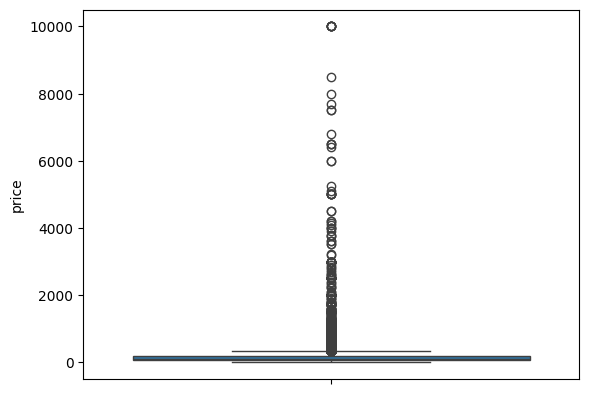

In [26]:
sns.boxplot(df['price'])

<Axes: xlabel='price', ylabel='Count'>

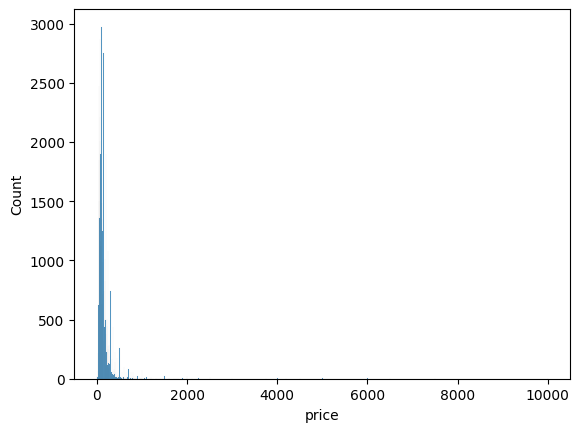

In [31]:
sns.histplot(df['price'])

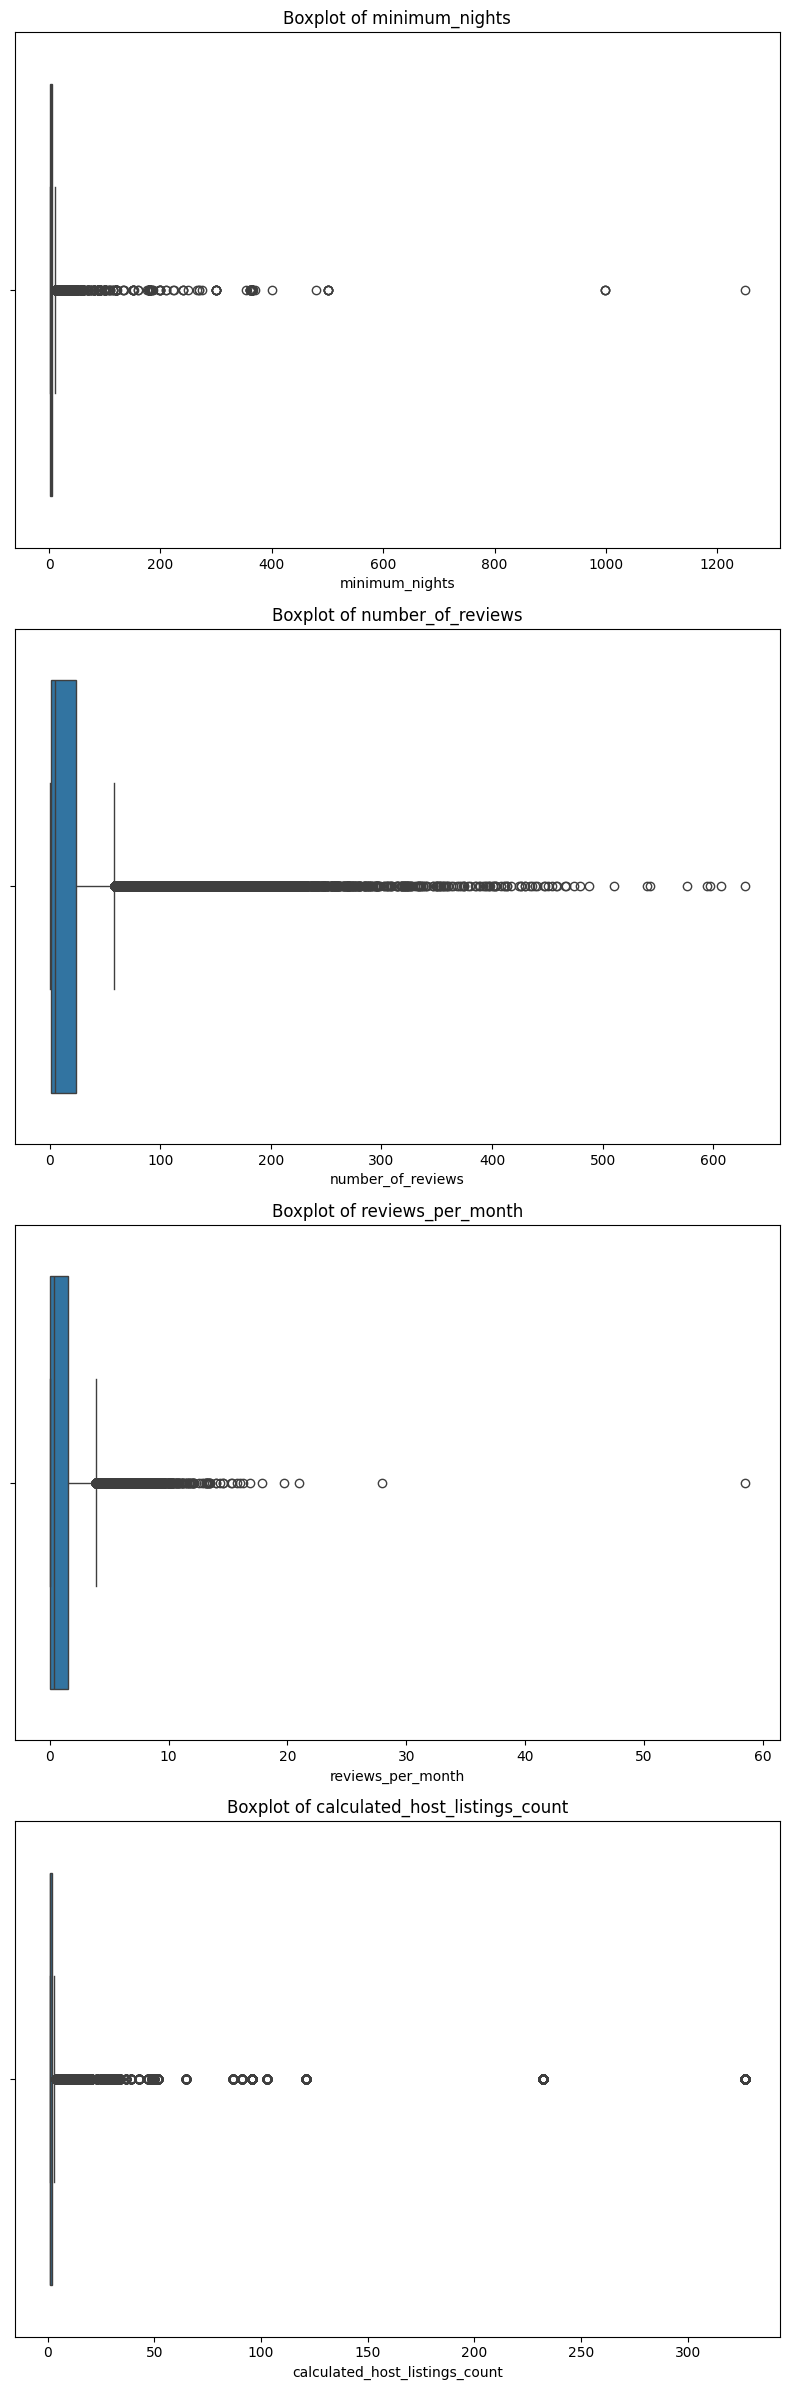

In [30]:
columns_to_plot = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 6 * len(columns_to_plot)))


for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

USING IQR TO DETECT AND REMOVE OUTLINER


In [57]:

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']].quantile(0.25)
Q3 = df[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


print("Lower limit for Outliers:")
print(lower_limit)
print("\nUpper limit for Outliers:")
print(upper_limit)

Lower limit for Outliers:
price                             -90.00
minimum_nights                     -5.00
number_of_reviews                 -33.50
reviews_per_month                  -2.27
calculated_host_listings_count     -0.50
availability_365                 -340.50
dtype: float64

Upper limit for Outliers:
price                             334.00
minimum_nights                     11.00
number_of_reviews                  58.50
reviews_per_month                   3.89
calculated_host_listings_count      3.50
availability_365                  567.50
dtype: float64


In [56]:
df_no= df[
    (df['price'] >= lower_limit['price']) & (df['price'] <= upper_limit['price']) &
    (df['minimum_nights'] >= lower_limit['minimum_nights']) & (df['minimum_nights'] <= upper_limit['minimum_nights']) &
    (df['number_of_reviews'] >= lower_limit['number_of_reviews']) & (df['number_of_reviews'] <= upper_limit['number_of_reviews']) &
    (df['reviews_per_month'] >= lower_limit['reviews_per_month']) & (df['reviews_per_month'] <= upper_limit['reviews_per_month']) &
    (df['calculated_host_listings_count'] >= lower_limit['calculated_host_listings_count']) & (df['calculated_host_listings_count'] <= upper_limit['calculated_host_listings_count']) &
    (df['availability_365'] >= lower_limit['availability_365']) & (df['availability_365'] <= upper_limit['availability_365'])
]

# Print the shape of the DataFrame before and after removing outliers
print("\nShape of DataFrame before removing outliers:", df.shape)
print("Shape of DataFrame after removing outliers:", df_no.shape)


Shape of DataFrame before removing outliers: (48858, 16)
Shape of DataFrame after removing outliers: (29678, 16)
